# Importy

In [145]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pandas as pd
from scipy.interpolate import CubicSpline
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import binomtest
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.contingency_tables import mcnemar
from statsmodels.stats.api import SquareTable
import statsmodels
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings('ignore')
statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF(True)

sns.set_style()

plt.rc('figure', figsize=(10, 6))
plt.rc('font', size=12)

# Raport 3

**Nazwa kursu:** Analiza danych ankietowych

**Prowadzący:** dr Rafał Połoczański

**Autorzy:** Antczak Jakub (268745), Curkowicz Kinga (268774)

**Rok akademicki:** 2023/2024

## Spis treści

1. [Część I i II](#Część-I)
    - [Zadanie 1](#Zadanie-1)
    - [Zadanie 2](#Zadanie-2)
    - [Zadanie 3](#Zadanie-3)
    - [Zadanie 4](#Zadanie-4)
    - [Zadanie 5](#Zadanie-5)
2. [Część III](#Część-III)
    - [Zadanie 6](#Zadanie-6)
    - [Zadanie 7](#Zadanie-7)
3. [Część IV i V](#Część-IV-V)
    - [Zadanie 8](#Zadanie-11)
    - [Zadanie 9](#Zadanie-9)
    - [Zadanie 10](#Zadanie-10)
4. [Zadania dodatkowe](#Zadania-dodatkowe)

# Część I i II

## Zadanie 1

Aby obliczyć p-wartość w warunkowym teście symetrii dla tabel $2 \times 2$, używamy następującego wzoru:
$$
p = \sum_{i=0}^{y_L} P(X = i) + \sum_{i=y_P}^{n^*} P(X = i),
$$

gdzie:

- $n^* = y_{12} + y_{21}$,
- $y_L = \min(y_{12}, n^* - y_{12})$,
- $y_P = \max(y_{12}, n^* - y_{12})$,
- $X \sim \mathcal{B}(n^*, 1/2)$.

Oznacza to, że najpierw obliczamy $n^*$ jako sumę wartości w komórkach $y_{12}$ i $y_{21}$. Następnie wyznaczamy wartości $y_L$ i $y_P$, które są odpowiednio minimum i maksimum z $y_{12}$ oraz $n^* - y_{12}$. Następnie sumujemy wartości funkcji masy prawdopodobieństwa rozkładu dwumianowego $\mathcal{B}(n^*;0.5)$ dla przedziałów od 0 do $y_L$ oraz od $y_P$ do $n^*$.

Wartość $X$ jest zmienną losową o rozkładzie dwumianowym $\mathcal{B}(n^*, 1/2)$.

In [146]:
def symmetry(table):
    """
    Calculate the p-value for testing symmetry in a 2x2 contingency table.

    This function computes the p-value based on a two-sided test for symmetry in a 2x2
    contingency table. The test is conducted by considering the sum of the off-diagonal
    counts and calculating the probability of observing these counts or more extreme
    values under the assumption of symmetry (i.e., the null hypothesis that the counts
    follow a binomial distribution with a probability of 0.5).

    Parameters:
    - table (np.ndarray): A 2x2 numpy array representing the contingency table. The
      elements table[0, 1] and table[1, 0] are the off-diagonal counts which are used
      in the test.

    Returns:
    - float: The computed p-value indicating the probability of observing the given
      off-diagonal counts or more extreme counts under the null hypothesis of symmetry.
    """
    y12, y21 = table[0, 1], table[1, 0]
    n_star = y12 + y21

    y_L = min(y12, n_star - y12)
    y_P = max(y12, n_star - y12)

    y_L_range = np.arange(y_L + 1)
    y_P_range = np.arange(y_P, n_star + 1)

    y_L_pmf = scipy.stats.binom.pmf(y_L_range, n_star, 0.5)
    y_P_pmf = scipy.stats.binom.pmf(y_P_range, n_star, 0.5)

    p_value = y_L_pmf.sum() + y_P_pmf.sum()
    return p_value

In [147]:
table = np.array([[30, 24], [46, 36]])
table

array([[30, 24],
       [46, 36]])

In [148]:
symmetry(table)

0.011526409654363495

Wyniki warunkowego testu symetrii wykazały, że istnieje istotna różnica między częstościami par `(A, B)` i `(B, A)` w naszej tabeli. Ze względu na to, że p-wartość $0.0115$ jest mniejsza od poziomu istotności $0.05$, mamy podstawy do odrzucenia hipotezy zerowej na poziomie istotności $0.05$, co wskazuje na asymetrię w danych.

## Zadanie 2


W tabeli w zadaniu 2 przedstawiono dane dotyczące reakcji na dwa różne leki przeciwbólowe stosowane w migrenie. Leki zostały zaaplikowane grupie pacjentów podczas dwóch różnych ataków bólowych. Na podstawie danych zostanie zweryfikowana hipoteza, że te leki są jednakowo skuteczne, korzystając z testu McNemara z poprawką na ciągłość oraz testu warunkowego.

In [149]:
table_meds = np.array([[1, 5], [2, 4]])
table_meds

array([[1, 5],
       [2, 4]])

### McNemar z poprawką na ciągłość

W celu przeprowadzenia testu McNemara z poprawką na ciągłość, użyliśmy funkcji z pakietu `statsmodels` w języku Python. Funkcja ta zwraca wartość statystyki testowej oraz p-wartość.

In [150]:
mcnemar(table_meds, exact=False,correction=True).pvalue

0.4496917979688908

Uzyskane p-value wynosi $0.4497$. Ponieważ p-value jest większe od przyjętego poziomu istotności $0.05$, nie mamy podstaw do odrzucenia hipotezy zerowej. Sugeruje to, że nie ma statystycznie istotnych różnic w skuteczności leków A i B

Podsumowując, wyniki obu testów wskazują, że nie ma statystycznie istotnych różnic w skuteczności dwóch leków przeciwbólowych stosowanych w migrenie.

### Funkcja z 1 zadania na warunkowy test symetrii

In [151]:
symmetry(table_meds)

0.45312500000000006

Uzyskane p-value wynosi $0.4531$ w warunkowym teście symetrii. Ponownie wartość p-value jest większe od przyjętego poziomu istotności $0.05$, więc również nie mamy podstaw do odrzucenia hipotezy zerowej. To również sugeruje, że skuteczność leków A i B jest podobna.

## Zadanie 3

W zadaniu 3 będziemy przeprowadzać symulacje mające na celu porównanie mocy testu $Z$ oraz testu $Z_0$, które były przedstawione na wykładzie. Analiza będzie obejmować różne długości prób, co pozwoli na ocenę efektywności obu testów w zależności od wielkości danych.

Zacznijmy od przedstawienia statystyk testowych $Z$ oraz $Z_0$.

**Statystyka testowa Z:**

$$
Z = \frac{D}{\hat\sigma(D)},
$$

gdzie:

$$
D = \frac{(Y_{12} - Y_{21})}{n}
$$

oraz

$$
\hat \sigma^2(D) = \frac{1}{n} \left[ \hat p_{1+} (1 - \hat p_{1+}) + \hat p_{+1} (1 - \hat p_{+1}) - 2 (\hat p_{11} \hat p_{22} - \hat p_{12} \hat p_{21}) \right].
$$

**Statystyka testowa $Z_0$:**

$$
Z_0 = \frac{D}{\hat\sigma_0(D)} = \frac{Y_{12} - Y_{21}}{\sqrt{Y_{12} + Y_{21}}},
$$

gdzie:

$$
D = \frac{(Y_{12} - Y_{21})}{n}
$$

oraz

$$
\hat \sigma_0^2(D) = \frac{Y_{12} + Y_{21}}{n^2}.
$$

P-wartość dla obu testów oblicza się korzystając z rozkładu normalnego:

$$
p = 2(1 - \Phi(|Z|)),
$$

$\Phi$ - oznacza dystrybuantę rozkładu normalnego $\N(0,1)$.

Zaimplementujmy to teraz.

In [152]:
def calculate_D(y12, y21, n):
    """
    Calculate the observed difference in proportions D between two related samples.

    Parameters:
    - y12 (int): Count of occurrences in the first sample leading to the second sample.
    - y21 (int): Count of occurrences in the second sample leading to the first sample.
    - n (int): Total number of observations.

    Returns:
    - float: The computed difference in proportions.
    """
    return (y12 - y21) / n


def calculate_sigma2_D(p1_plus, p_plus1, p11, p22, n):
    """
    Calculate the variance of D under the alternative hypothesis.

    Parameters:
    - p1_plus (float): Marginal probability of the first condition.
    - p_plus1 (float): Marginal probability of the second condition.
    - p11 (float): Joint probability of both conditions occurring.
    - p22 (float): Joint probability of neither condition occurring.
    - n (int): Total number of observations.

    Returns:
    - float: The variance of D.
    """
    return (
        p1_plus * (1 - p1_plus)
        + p_plus1 * (1 - p_plus1)
        - 2 * (p11 * p22 - p1_plus * p_plus1)
    ) / n


def calculate_sigma2_D0(y12, y21, n):
    """
    Calculate the variance of D under the null hypothesis.

    Parameters:
    - y12 (int): Count of occurrences in the first sample leading to the second sample.
    - y21 (int): Count of occurrences in the second sample leading to the first sample.
    - n (int): Total number of observations.

    Returns:
    - float: The variance of D under the null hypothesis.
    """
    return (y12 + y21) / n**2


def test_Z(y12, y21, n, p1_plus, p_plus1, p11, p22):
    """
    Calculate the Z-test statistic for the hypothesis that the observed difference in proportions is zero.

    Parameters:
    - y12 (int), y21 (int), n (int): Inputs for the observed difference D.
    - p1_plus (float), p_plus1 (float), p11 (float), p22 (float): Probabilities required to calculate the variance of D.

    Returns:
    - float: The p-value from the Z-test.
    """
    D = calculate_D(y12, y21, n)
    sigma2_D = calculate_sigma2_D(p1_plus, p_plus1, p11, p22, n)
    Z = D / np.sqrt(sigma2_D)
    p_value_Z = 2 * (1 - scipy.stats.norm.cdf(np.abs(Z)))
    return p_value_Z


def test_Z0(y12, y21, n):
    """
    Calculate the Z-test statistic under the null hypothesis that the observed difference in proportions is zero.

    Parameters:
    - y12 (int): Count of occurrences in the first sample leading to the second sample.
    - y21 (int): Count of occurrences in the second sample leading to the first sample.
    - n (int): Total number of observations.

    Returns:
    - float: The p-value from the Z-test under the null hypothesis.
    """
    D = calculate_D(y12, y21, n)
    sigma2_D0 = calculate_sigma2_D0(y12, y21, n)
    Z0 = D / np.sqrt(sigma2_D0)
    p_value_Z0 = 2 * (1 - scipy.stats.norm.cdf(np.abs(Z0)))
    return p_value_Z0

Przeprowadźmy teraz symulację mocy testu dla różnych długości prób. W tym celu wygenerujemy dane z rozkładu dwumianowego z różnymi wartościami $n$, następnie stworzymy tablicę dwudzielczą i obliczymy obie statystyki testowe. Następnie obliczymy p-wartość dla obu testów. Jeśli p-wartość będzie mniejsza od poziomu istotności (przyjęliśmy poziom istotności $\alpha=0.05$), to odrzucimy hipotezę zerową. Powtórzymy te kroki 1000 razy. Ostateczna moc testu to wartość:
$$\text{Moc testu}=\frac{\text{ilość odrzuceń}}{\text{ilość powtórzeń}} $$

In [153]:
def perform_simulation(p1, p2, n, repetitions):
    """
    Perform a statistical power simulation to compare two proportions using two different Z-tests.

    This function simulates the process of drawing samples from two binomial distributions with probabilities p1 and p2,
    respectively. It then performs two types of Z-tests on the samples: one assuming unequal variances (Z) and the other
    assuming equal variances under the null hypothesis (Z0). The simulation counts the number of rejections of the null
    hypothesis from each test and calculates the statistical power of each test.

    Parameters:
    - p1 (float): Probability of success for the first binomial distribution.
    - p2 (float): Probability of success for the second binomial distribution.
    - n (int): Number of trials in each binomial sample.
    - repetitions (int): Number of times the whole process is to be simulated.

    Returns:
    - tuple: A tuple containing the statistical power (proportion of rejections) for each Z-test:
        - power_Z (float): Power of the Z-test assuming unequal variances.
        - power_Z0 (float): Power of the Z-test under the null hypothesis (equal variances).
    """
    rejections_Z = 0
    rejections_Z0 = 0

    for _ in range(repetitions):
        x = np.random.binomial(1, p1, n)
        y = np.random.binomial(1, p2, n)

        # Tworzenie tabeli dwudzielczej
        y11 = np.sum((x == 1) & (y == 1))
        y12 = np.sum((x == 1) & (y == 0))
        y21 = np.sum((x == 0) & (y == 1))
        y22 = np.sum((x == 0) & (y == 0))

        y1_plus = y11 + y12
        y2_plus = y21 + y22
        y_plus1 = y11 + y21
        y_plus2 = y12 + y22

        total_n = y1_plus + y2_plus

        if total_n == 0:
            continue  
        p1_plus = y1_plus / total_n
        p_plus1 = y_plus1 / total_n
        p11 = y11 / total_n
        p22 = y22 / total_n

        p_value_Z = test_Z(y12, y21, total_n, p1_plus, p_plus1, p11, p22)
        p_value_Z0 = test_Z0(y12, y21, total_n)

        if p_value_Z < 0.05:
            rejections_Z += 1
        if p_value_Z0 < 0.05:
            rejections_Z0 += 1

    power_Z = rejections_Z / repetitions
    power_Z0 = rejections_Z0 / repetitions

    return power_Z, power_Z0

In [154]:
p2_all = np.linspace(0, 1, 100)
p2_all = p2_all[p2_all != 0.5]

In [155]:
p1 = 0.5
p2_values = p2_all
n_values = [20, 50, 100, 1000]
repetitions = 1000

results = {}
for p2 in p2_values:
    for n in n_values:
        power_Z, power_Z0 = perform_simulation(p1, p2, n, repetitions)
        results[(p2, n)] = (power_Z, power_Z0)

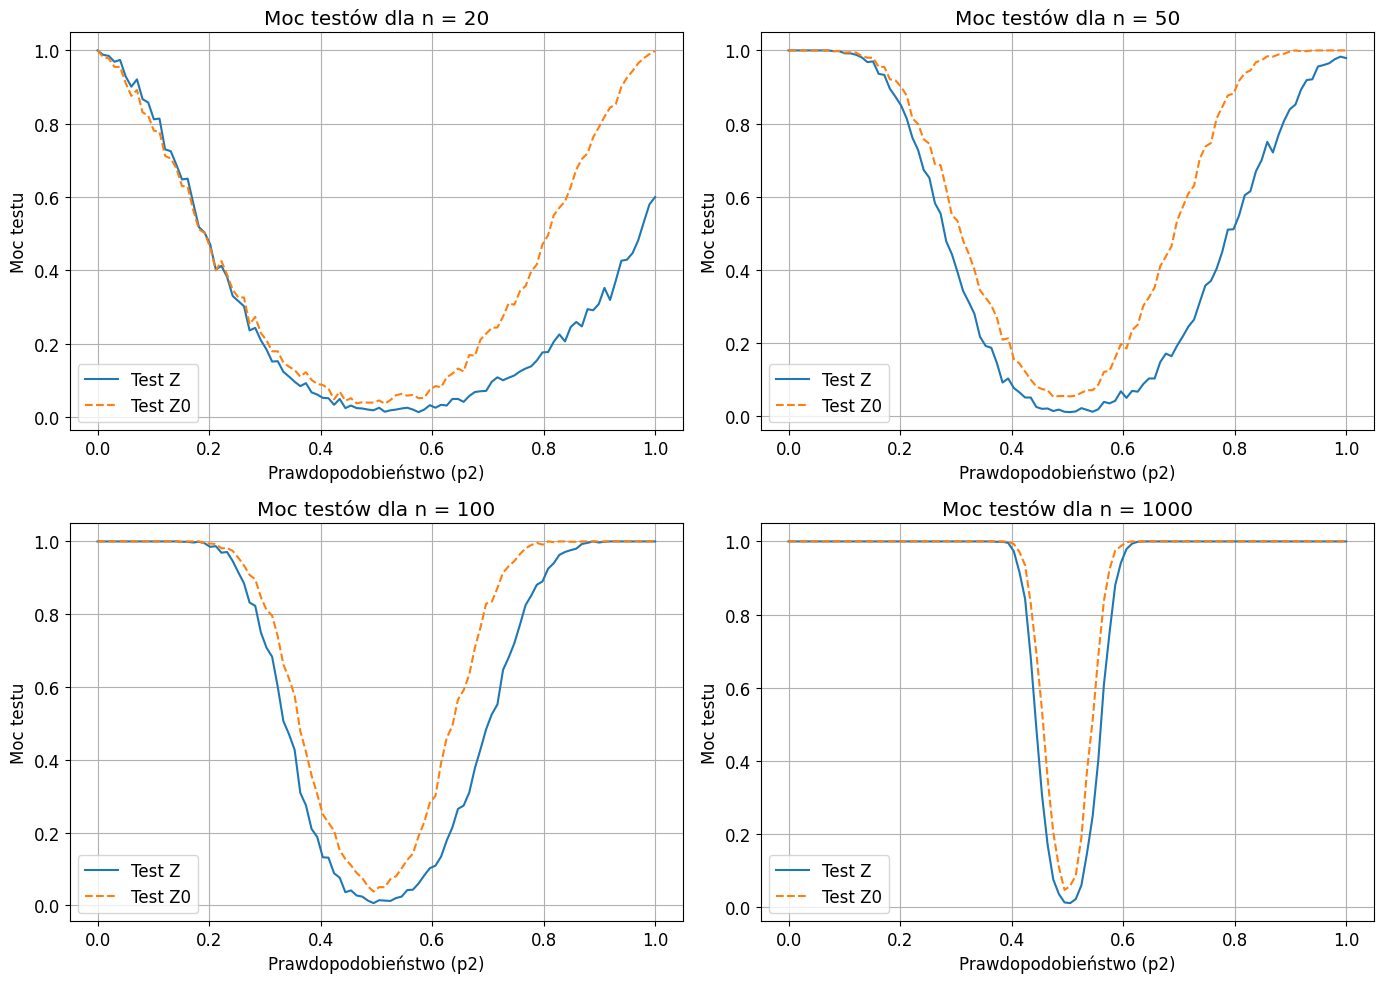

In [156]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for idx, n in enumerate(n_values):
    ax = axs[idx // 2, idx % 2]
    p2s = [p2 for p2 in p2_values]
    powers_Z = [results[(p2, n)][0] for p2 in p2_values]
    powers_Z0 = [results[(p2, n)][1] for p2 in p2_values]

    ax.plot(p2s, powers_Z, label="Test Z")
    ax.plot(p2s, powers_Z0, label="Test Z0", linestyle="--")
    ax.set_xlabel("Prawdopodobieństwo (p2)")
    ax.set_ylabel("Moc testu")
    ax.set_title(f"Moc testów dla n = {n}")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

**Wnioski:**

- Test $Z_0$ wydaje się być bardziej efektywny, czyli ma większą moc w porównaniu do testu $Z$ dla różnych rozmiarów próby.
- Różnice w mocy obu testów są najbardziej widoczne przy mniejszych próbach, gdzie test $Z_0$ wykazuje znaczną przewagę.
- Dla bardzo dużych prób, różnice w mocy testów stają się minimalne, co sugeruje, że oba testy są równie skuteczne przy dużych rozmiarach próby.

## Zadanie 4

W zadaniu 4 będziemy weryfikować hipotezę, że zadowolenie z wynagrodzenia w pierwszym badanym okresie oraz po roku od pierwszego badania odpowiada modelowi symetrii. Do analizy użyjemy danych dołączonych do pierwszej listy zadań, opierając się na zmiennych `CZY_ZADW` oraz `CZY_ZADW_2`. Przeprowadzimy testy statystyczne, aby zweryfikować powyższą hipotezę, przyjmując poziom istotności $\alpha = 0.05$. Na podstawie uzyskanych wyników odpowiemy na pytanie:

**Czy na podstawie uzyskanych wyników możemy wnioskować, że poziom zadowolenia z wynagrodzenia nie uległ zmianie?**

Zacznijmy od wczytania danych, a następnie przeprowadźmy test `McNemara` oraz warunkowy test symetrii z zadania 1.


In [157]:
df = pd.read_csv("ankieta.csv", sep=";", encoding="unicode_escape")
df.rename(columns={"DZIA£": "DZIAŁ", "STA¯": "STAŻ", "P£EÆ": "PŁEĆ"}, inplace=True)
df['DZIAŁ'] = df['DZIAŁ'].astype('category')
df['STAŻ'] = df['STAŻ'].astype('category')
df['CZY_KIER']=df['CZY_KIER'].astype('category')
df['PYT_1'] = df['PYT_1'].astype('category')
df['PYT_2'] = df['PYT_2'].astype('category')
df['PYT_3'] = df['PYT_3'].astype('category')
df['PŁEĆ'] = df['PŁEĆ'].astype('category')
df['WIEK'] = df['WIEK'].astype('category')
df.head()

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK
0,IT,2,Nie,1,-2,1,M,64
1,IT,2,Nie,0,-2,-2,M,67
2,IT,2,Nie,1,2,2,M,65
3,IT,2,Nie,-1,-2,-2,K,68
4,IT,3,Tak,1,2,-1,K,65


In [158]:
df["CZY_ZADOW"] = df["PYT_2"].map({2: "TAK", 1: "TAK", -1: "NIE", -2: "NIE"})
df["CZY_ZADOW"] = df["CZY_ZADOW"].astype('category')
df

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,CZY_ZADOW
0,IT,2,Nie,1,-2,1,M,64,NIE
1,IT,2,Nie,0,-2,-2,M,67,NIE
2,IT,2,Nie,1,2,2,M,65,TAK
3,IT,2,Nie,-1,-2,-2,K,68,NIE
4,IT,3,Tak,1,2,-1,K,65,TAK
...,...,...,...,...,...,...,...,...,...
195,HR,2,Nie,1,2,2,M,42,TAK
196,HR,2,Nie,1,-1,-1,K,35,NIE
197,HR,2,Nie,-1,-2,-2,K,39,NIE
198,HR,2,Nie,1,2,1,K,48,TAK


In [159]:
df["CZY_ZADOW2"] = df["PYT_3"].map({2: "TAK", 1: "TAK", -1: "NIE", -2: "NIE"})
df["CZY_ZADOW2"] = df["CZY_ZADOW2"].astype('category')
df

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,CZY_ZADOW,CZY_ZADOW2
0,IT,2,Nie,1,-2,1,M,64,NIE,TAK
1,IT,2,Nie,0,-2,-2,M,67,NIE,NIE
2,IT,2,Nie,1,2,2,M,65,TAK,TAK
3,IT,2,Nie,-1,-2,-2,K,68,NIE,NIE
4,IT,3,Tak,1,2,-1,K,65,TAK,NIE
...,...,...,...,...,...,...,...,...,...,...
195,HR,2,Nie,1,2,2,M,42,TAK,TAK
196,HR,2,Nie,1,-1,-1,K,35,NIE,NIE
197,HR,2,Nie,-1,-2,-2,K,39,NIE,NIE
198,HR,2,Nie,1,2,1,K,48,TAK,TAK


In [160]:
df_zad3 = pd.crosstab(df["CZY_ZADOW"], df["CZY_ZADOW2"])
table_zadow = df_zad3.to_numpy()
table_zadow

array([[74, 20],
       [ 8, 98]], dtype=int64)

### Test warunkowy z zadania 1

In [161]:
symmetry(table_zadow)

0.03569813817739485

### Test McNemara z poprawką na ciągłość

In [162]:
mcnemar(table_zadow, exact=False, correction=True).pvalue

0.03763531378731436

**Wnioski**:

Warunkowy test symetrii:

Wartość $p = 0.0357$ jest mniejsza od przyjętego poziomu istotności $\alpha = 0.05$, więc odrzucamy hipotezę zerową. Oznacza to, że istnieją statystycznie istotne różnice w rozkładzie zadowolenia z wynagrodzenia między pierwszym okresem a rokiem później.

Test McNemara z poprawką na ciągłość:

Ponownie, wartość $p = 0.0376$ jest mniejsza od przyjętego poziomu istotności $\alpha = 0.05$, co prowadzi do odrzucenia hipotezy zerowej. Również ten test wskazuje na statystycznie istotne różnice w zadowoleniu z wynagrodzenia między dwoma okresami.

Zatem na podstawie uzyskanych wyników możemy wnioskować, że poziom zadowolenia z wynagrodzenia uległ zmianie w ciągu roku od pierwszego badania. Oba testy statystyczne warunkowy test symetrii oraz test McNemara z poprawką na ciągłość wykazały, że różnice w zadowoleniu są statystycznie istotne przy poziomie istotności $\alpha = 0.05$.

## Zadanie 5

W zadaniu 5 analizujemy dane dotyczące oceny podejścia firmy do utrzymania równowagi między życiem zawodowym a prywatnym przed i po wdrożeniu działań poprawiających komfort pracy. Na podstawie tablicy dwudzielnej zweryfikujemy hipotezę, że odpowiedzi respondentów w obu okresach odpowiadają modelowi symetrii.

Następnie, na podstawie wyników testu statystycznego przy poziomie istotności $\alpha = 0.05$ ocenimy, czy ocena podejścia firmy uległa zmianie po wdrożeniu działań.

Zacznijmy od wczytania danych, a następnie przeprowadźmy test `Bowkera`. W celu jego użycia skorzystaliśmy z funkcji wbudowanej `SquareTable` z pakietu `statsmodels`.

In [163]:
data_tab5 = np.array(
    [
        [10, 2, 1, 1, 0],
        [0, 15, 1, 1, 0],
        [1, 1, 32, 6, 0],
        [0, 0, 1, 96, 3],
        [1, 1, 0, 1, 26],
    ]
)

In [164]:
print(SquareTable(data_tab5, shift_zeros=False).symmetry(method="bowker"))

df          10.0
pvalue      0.3918667295870472
statistic   10.571428571428571


**Wnioski**:

Wartość $p$ wynosząca $0.3919$ jest znacznie większa od przyjętego poziomu istotności $\alpha = 0.05$, zatem nie mamy podstaw do odrzucenia hipotezy zerowej o symetrii rozkładu odpowiedzi między dwoma okresami.

Na podstawie wyników testu symetrii Bowkera możemy stwierdzić, że nie ma statystycznie istotnych różnic w ocenie podejścia firmy do utrzymania równowagi między życiem zawodowym a prywatnym, między pierwszym okresem a okresem po wdrożeniu działań poprawiających komfort pracy. Oznacza to, że ocena podejścia firmy nie uległa znaczącej zmianie.


# Część III

## Zadanie 6

W zadaniu 6 porównamy skuteczność dwóch metod leczenia: Leczenia A (nowa procedura) i Leczenia B (stara procedura). Przeanalizujemy dane, które zawierają wyniki dla całej grupy pacjentów oraz te które zawierają wyniki w podgrupach wyodrębnionych na podstawie dodatkowej zmiennej i odpowiemy na pytanie, czy dla danych występuje paradoks Simpsona.

Paradoks Simpsona to zjawisko w statystyce, gdzie trend obserwowany w kilku grupach danych znika lub odwraca się, gdy dane te są agregowane. Ilustruje ważność dokładnej analizy warstwowej danych i uwzględniania potencjalnych czynników zakłócających przed wyciąganiem ostatecznych wniosków.

Wykorzystajmy do tego testy asymptotyczne, czyli omówiony w rapocie 1 `proportion_ztest`.

In [165]:
data_all = {
    "Metoda": ["Leczenie A", "Leczenie B"],
    "Poprawa": [117, 177],
    "Brak": [104, 44],
}

df_all = pd.DataFrame(data_all)

data_comorbidities = {
    "Metoda": ["Leczenie A", "Leczenie B"],
    "Poprawa": [17, 2],
    "Brak": [101, 36],
}

df_comorbidities = pd.DataFrame(data_comorbidities)

data_no_comorbidities = {
    "Metoda": ["Leczenie A", "Leczenie B"],
    "Poprawa": [100, 175],
    "Brak": [3, 8],
}
df_no_comorbidities = pd.DataFrame(data_no_comorbidities)

$H_0:$ Prawdopodobieństwo, pozytywnej reakcji na leczenie A jest większe bądź równe prawdopodobieństwu pozytywnej reakcji na leczenie B.

In [166]:
success = df_all["Poprawa"].values
nobs = df_all["Poprawa"].values + df_all["Brak"].values

stat, p_value = proportions_ztest(success, nobs, alternative="smaller")
p_value

7.366990838975527e-10

Odrzucamy hipotezę zerową.

$H_0:$ Prawdopodobieństwo, pozytywnej reakcji na leczenie A jest większę bądź równe prawdopodobieństwu pozytywnej reakcji na leczenie B w grupie pacjentów z chorobami współistniejącymi.

In [167]:
success2 = df_comorbidities["Poprawa"].values
nobs2 = df_comorbidities["Poprawa"].values + df_comorbidities["Brak"].values

stat2, p_value2 = proportions_ztest(success2, nobs2, alternative="smaller")
p_value2

0.9330518282889859

Nie ma podstaw do odrzucenia hipotezy zerowej.

$H_0:$ Prawdopodobieństwo, pozytywnej reakcji na leczenie A jest większe bądź równe prawdopodobieństwu pozytywnej reakcji na leczenie B w grupie pacjentów bez chorób współistniejących.

In [168]:
success3 = df_no_comorbidities["Poprawa"].values
nobs3 = df_no_comorbidities["Poprawa"].values + df_no_comorbidities["Brak"].values

stat3, p_value3 = proportions_ztest(success3, nobs3, alternative="smaller")
p_value3

0.7310191118777514

Nie ma podstaw do odrzucenia hipotezy zerowej.

**Wnioski**:

Na podstawie wyników testów proporcji możemy stwierdzić, że występuje paradoks Simpsona.

## Zadanie 7

W zadaniu 7 analizujemy dane z listy 1, przyjmując za zmienną 1 zmienną `CZY_KIER`, za zmienną 2 zmienną `PYT_2` oraz za zmienną 3 zmienną `STAŻ`. Naszym celem jest podanie interpretacji następujących modeli log-liniowych: [1 3], [13], [1 2 3], [12 3], [12 13] oraz [1 23]. Gdzie:

- `CZY_KIER` - zmienna przyjmująca wartości `Tak` (stanowisko kierownicze) i `Nie` (inne stanowisko),
- `PYT_2` - zmienna przyjmująca wartosci: -2 (zdecydowanie się nie zgadzam), -1 (nie zgadzam się), 1 (zgadzam się), 2 (zdecydowanie się zgadzam), reprezentuje odpowiedzi na pytanie dotyczące zadowolenia z wynagrodzenia.
- `STAŻ` - zmienna przyjmująca wartości: 1 (Poniżej jednego roku), 2 (Między jednym rokiem a trzema latami) lub 3 (Powyzej trzech lat), dotyczy długości stażu w firmie.

Oznaczmy zmienne następująco:
- `CZY_KIER` (1), 
- `PYT_2` (2),
- `STAŻ` (3).

Na pytanie `CZY_KIER` mamy dwie możliwe odpowiedzi, na pytanie `PYT_2` mamy cztery możliwe odpowiedzi, a na 'STAŻ' mamy 3 możliwe odpowiedzi.

In [169]:
czy_kier = df["CZY_KIER"]

pyt_2 = df["PYT_2"]

staz = df["STAŻ"]

In [213]:
data_freq = pd.DataFrame(df.groupby(["CZY_KIER", "PYT_2", "STAŻ"]).size())
data_freq.reset_index(inplace=True)
data_freq.rename(columns={0: "ILOŚĆ"}, inplace=True)
data_freq["PRAWDOPODOBIEŃSTWO"] = data_freq["ILOŚĆ"]
data_freq

,CZY_KIER,PYT_2,STAŻ,ILOŚĆ,PRAWDOPODOBIEŃSTWO
0,Nie,-2,1,19,19
1,Nie,-2,2,40,40
2,Nie,-2,3,5,5
3,Nie,-1,1,3,3
4,Nie,-1,2,15,15
5,Nie,-1,3,0,0
6,Nie,1,1,0,0
7,Nie,1,2,0,0
8,Nie,1,3,0,0
9,Nie,2,1,18,18


In [171]:
pd.crosstab([czy_kier, pyt_2], staz, margins=True)

STAŻ             1    2   3  All
CZY_KIER PYT_2                  
Nie      -2     19   40   5   64
         -1      3   15   0   18
         2      18   68   5   91
Tak      -2      1    5   4   10
         -1      0    2   0    2
         1       0    0   2    2
         2       0   10   3   13
All             41  140  19  200

### Model [1 3]

Model ten przyjmuje następującą postać:

$$\ell^{(1)}_{ij} = \lambda + \lambda_i^{(1)} + \lambda_j^{(3)}$$
$$ \forall i \in \{1,2\}, \forall j \in \{1,2,3\}$$

In [172]:
formula1_zad7 = "PRAWDOPODOBIEŃSTWO ~ CZY_KIER + STAŻ"
sm.GLM.from_formula(formula1_zad7, data=data_freq, family=sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     PRAWDOPODOBIEŃSTWO   No. Observations:                   24
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -129.91
Date:                Wed, 19 Jun 2024   Deviance:                       203.07
Time:                        20:42:37   Pearson chi2:                     177.
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.1823      0.159     13.755      0.000       1.871       2.493
CZY_KIER[T.Tak]    -1.8575      0.207     -8.977      0.000      -2.263      -1.452
STAŻ[T.2]           1.2281      0.178      6.916      0.000       0.880       1.576
STAŻ[T.3]          -0.7691      0.278     -2.771      0.006      -1.313      -0.225
===================================================================================
"""

### Model [13]

Model ten przyjmuje następującą postać:
$$ \ell_{ij} = \lambda + \lambda_i^{(1)} + \lambda_j^{(3)} + \lambda_{ij}^{(13)}$$
$$ \forall i \in \{1,2\}, \forall j \in \{1,2,3\}$$

In [173]:
formula2_zad7 = "PRAWDOPODOBIEŃSTWO ~ CZY_KIER + STAŻ + CZY_KIER*STAŻ"
sm.GLM.from_formula(formula2_zad7, data=data_freq, family=sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     PRAWDOPODOBIEŃSTWO   No. Observations:                   24
Model:                            GLM   Df Residuals:                       18
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -120.37
Date:                Wed, 19 Jun 2024   Deviance:                       183.98
Time:                        20:42:37   Pearson chi2:                     146.
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.3026      0.158     14.563      0.000       1.993       2.612
CZY_KIER[T.Tak]              -3.6889      1.012     -3.644      0.000      -5.673      -1.705
STAŻ[T.2]                     1.1233      0.182      6.171      0.000       0.767       1.480
STAŻ[T.3]                    -1.3863      0.354     -3.921      0.000      -2.079      -0.693
CZY_KIER[T.Tak]:STAŻ[T.2]     1.7099      1.045      1.636      0.102      -0.338       3.758
CZY_KIER[T.Tak]:STAŻ[T.3]     3.5835      1.112      3.223      0.001       1.404       5.763
=============================================================================================
"""

### Model [1 2 3]


Model ten przyjmuje następującą postać:
$$ \ell_{ijk} = \lambda + \lambda_i^{(1)} + \lambda_j^{(2)} + \lambda_k^{(3)}$$
$$ \forall i \in \{1,2\}, \forall j \in \{1,2,3,4\}, \forall k \in \{1,2,3\}$$

In [174]:
formula3_zad7 = "PRAWDOPODOBIEŃSTWO ~ CZY_KIER + STAŻ + PYT_2"
sm.GLM.from_formula(formula3_zad7, data=data_freq, family=sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     PRAWDOPODOBIEŃSTWO   No. Observations:                   24
Model:                            GLM   Df Residuals:                       17
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -49.497
Date:                Wed, 19 Jun 2024   Deviance:                       42.242
Time:                        20:42:37   Pearson chi2:                     178.
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5743      0.184     14.026      0.000       2.215       2.934
CZY_KIER[T.Tak]    -1.8575      0.207     -8.977      0.000      -2.263      -1.452
STAŻ[T.2]           1.2281      0.178      6.916      0.000       0.880       1.576
STAŻ[T.3]          -0.7691      0.278     -2.771      0.006      -1.313      -0.225
PYT_2[T.-1]        -1.3083      0.252     -5.191      0.000      -1.802      -0.814
PYT_2[T.1]         -3.6109      0.717     -5.039      0.000      -5.015      -2.206
PYT_2[T.2]          0.3403      0.152      2.238      0.025       0.042       0.638
===================================================================================
"""

### Model [12 3]

Model ten przyjmuje następującą postać:
$$ \ell_{ijk} = \lambda + \lambda_i^{(1)} + \lambda_j^{(2)} + \lambda_k^{(3)} + \lambda_{ij}^{(12)}$$
$$ \forall i \in \{1,2\}, \forall j \in \{1,2,3,4\}, \forall k \in \{1,2,3\}$$

In [175]:
formula4_zad7 = "PRAWDOPODOBIEŃSTWO ~ STAŻ + CZY_KIER*PYT_2 + CZY_KIER + PYT_2"
sm.GLM.from_formula(formula4_zad7, data=data_freq, family=sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     PRAWDOPODOBIEŃSTWO   No. Observations:                   24
Model:                            GLM   Df Residuals:                       14
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45.333
Date:                Wed, 19 Jun 2024   Deviance:                       33.914
Time:                        20:42:37   Pearson chi2:                     43.6
No. Iterations:                    23   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.5741      0.187     13.756      0.000       2.207       2.941
STAŻ[T.2]                       1.2281      0.178      6.916      0.000       0.880       1.576
STAŻ[T.3]                      -0.7691      0.278     -2.771      0.006      -1.313      -0.225
CZY_KIER[T.Tak]                -1.8563      0.340     -5.459      0.000      -2.523      -1.190
PYT_2[T.-1]                    -1.2685      0.267     -4.755      0.000      -1.791      -0.746
PYT_2[T.1]                    -24.4272   1.53e+04     -0.002      0.999      -3e+04    2.99e+04
PYT_2[T.2]                      0.3520      0.163      2.158      0.031       0.032       0.672
CZY_KIER[T.Tak]:PYT_2[T.-1]    -0.3409      0.819     -0.416      0.677      -1.947       1.265
CZY_KIER[T.Tak]:PYT_2[T.1]     22.8178   1.53e+04      0.001      0.999   -2.99e+04       3e+04
CZY_KIER[T.Tak]:PYT_2[T.2]     -0.0896      0.451     -0.199      0.843      -0.974       0.795
===============================================================================================
"""

### Model [12 13]

Model ten przyjmuje następującą postać:
$$ \ell_{ijk} = \lambda + \lambda_i^{(1)} + \lambda_j^{(2)} + \lambda_k^{(3)} + \lambda_{ij}^{(12)} + \lambda_{ik}^{(13)}$$
$$ \forall i \in \{1,2\}, \forall j \in \{1,2,3,4\}, \forall k \in \{1,2,3\}$$

In [176]:
formula5_zad7 = "PRAWDOPODOBIEŃSTWO ~ CZY_KIER*PYT_2 + CZY_KIER*STAŻ + PYT_2 + STAŻ + CZY_KIER + STAŻ"
sm.GLM.from_formula(formula5_zad7, data=data_freq, family=sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     PRAWDOPODOBIEŃSTWO   No. Observations:                   24
Model:                            GLM   Df Residuals:                       12
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35.788
Date:                Wed, 19 Jun 2024   Deviance:                       14.824
Time:                        20:42:37   Pearson chi2:                     12.6
No. Iterations:                    23   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.6945      0.187     14.435      0.000       2.329       3.060
CZY_KIER[T.Tak]                -3.6877      1.048     -3.520      0.000      -5.741      -1.634
PYT_2[T.-1]                    -1.2685      0.267     -4.755      0.000      -1.791      -0.746
PYT_2[T.1]                    -24.2681   1.41e+04     -0.002      0.999   -2.77e+04    2.76e+04
PYT_2[T.2]                      0.3520      0.163      2.158      0.031       0.032       0.672
STAŻ[T.2]                       1.1233      0.182      6.171      0.000       0.767       1.480
STAŻ[T.3]                      -1.3863      0.354     -3.921      0.000      -2.079      -0.693
CZY_KIER[T.Tak]:PYT_2[T.-1]    -0.3409      0.819     -0.416      0.677      -1.947       1.265
CZY_KIER[T.Tak]:PYT_2[T.1]     22.6586   1.41e+04      0.002      0.999   -2.76e+04    2.77e+04
CZY_KIER[T.Tak]:PYT_2[T.2]     -0.0896      0.451     -0.199      0.843      -0.974       0.795
CZY_KIER[T.Tak]:STAŻ[T.2]       1.7099      1.045      1.636      0.102      -0.338       3.758
CZY_KIER[T.Tak]:STAŻ[T.3]       3.5835      1.112      3.223      0.001       1.404       5.763
===============================================================================================
"""

### Model [1 23]

Model ten przyjmuje następującą postać:
$$ \ell_{ijk} = \lambda + \lambda_i^{(1)} + \lambda_j^{(2)} + \lambda_k^{(3)} + \lambda_{jk}^{(23)}$$
$$ \forall i \in \{1,2\}, \forall j \in \{1,2,3,4\}, \forall k \in \{1,2,3\}$$

In [177]:
formula6_zad7 = "PRAWDOPODOBIEŃSTWO ~  CZY_KIER + PYT_2*STAŻ + PYT_2 + STAŻ"
sm.GLM.from_formula(formula6_zad7, data=data_freq, family=sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     PRAWDOPODOBIEŃSTWO   No. Observations:                   24
Model:                            GLM   Df Residuals:                       11
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -40.361
Date:                Wed, 19 Jun 2024   Deviance:                       23.970
Time:                        20:42:37   Pearson chi2:                     29.0
No. Iterations:                    24   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.8507      0.225     12.650      0.000       2.409       3.292
CZY_KIER[T.Tak]          -1.8575      0.207     -8.977      0.000      -2.263      -1.452
PYT_2[T.-1]              -1.8971      0.619     -3.064      0.002      -3.111      -0.684
PYT_2[T.1]              -24.6681   3.08e+04     -0.001      0.999   -6.04e+04    6.04e+04
PYT_2[T.2]               -0.1054      0.325     -0.324      0.746      -0.742       0.531
STAŻ[T.2]                 0.8109      0.269      3.018      0.003       0.284       1.338
STAŻ[T.3]                -0.7985      0.401     -1.989      0.047      -1.585      -0.012
PYT_2[T.-1]:STAŻ[T.2]     0.9237      0.681      1.355      0.175      -0.412       2.259
PYT_2[T.1]:STAŻ[T.2]     -0.8109   4.36e+04  -1.86e-05      1.000   -8.54e+04    8.54e+04
PYT_2[T.2]:STAŻ[T.2]      0.6554      0.375      1.748      0.080      -0.080       1.390
PYT_2[T.-1]:STAŻ[T.3]   -21.9724   3.08e+04     -0.001      0.999   -6.04e+04    6.04e+04
PYT_2[T.1]:STAŻ[T.3]     23.1640   3.08e+04      0.001      0.999   -6.04e+04    6.04e+04
PYT_2[T.2]:STAŻ[T.3]     -0.0124      0.585     -0.021      0.983      -1.158       1.133
=========================================================================================
"""

### Interpretacja modeli log-liniowych:

- **Model [1 3]:**
  - Zakłada interakcje między zmienną `CZY_KIER` (1) a zmienną `STAŻ` (3). Oznacza to, że model analizuje, jak współzależność między byciem kierownikiem a stażem pracy wpływa na analizowane zjawisko. Model ten nie uwzględnia bezpośrednio zmiennej `PYT_2` (2).

- **Model [13]:**
  - Oznacza model, który uwzględnia jedynie wspólne efekty `CZY_KIER` (1) i `STAŻ` (3), bez interakcji. Jest to prostsza wersja modelu w porównaniu do pełnego modelu z interakcjami.

- **Model [1 2 3]:**
  - Zakłada interakcje między wszystkimi trzema zmiennymi: `CZY_KIER` (1), `PYT_2` (2) i `STAŻ` (3). Oznacza to, że model analizuje, jak współzależność między byciem kierownikiem, odpowiedzią na pytanie 2 oraz stażem pracy wpływa na analizowane zjawisko. Jest to pełny model, uwzględniający wszystkie możliwe interakcje między zmiennymi.

- **Model [12 3]:**
  - Zakłada interakcje między zmienną `CZY_KIER` (1) a zmienną `PYT_2` (2), oraz uwzględnia zmienną `STAŻ` (3) jako niezależną, bez interakcji z innymi zmiennymi. Oznacza to, że model analizuje, jak współzależność między byciem kierownikiem a odpowiedzią na pytanie 2 wpływa na analizowane zjawisko, przy uwzględnieniu wpływu stażu pracy jako niezależnej zmiennej.

- **Model [12 13]:**
  - Zakłada interakcje między zmienną `CZY_KIER` (1) a zmienną `PYT_2` (2), oraz między `CZY_KIER` (1) a `STAŻ` (3). Oznacza to, że model analizuje, jak współzależność między byciem kierownikiem a odpowiedzią na pytanie 2 oraz jak współzależność między byciem kierownikiem a stażem pracy wpływają na analizowane zjawisko.

- **Model [1 23]:**
  - Zakłada interakcje między zmienną `CZY_KIER` (1) a interakcją zmiennych `PYT_2` (2) i `STAŻ` (3). Oznacza to, że model analizuje, jak zmienna `CZY_KIER` wpływa na współzależność między odpowiedzią na pytanie 2 a stażem pracy.

# Część IV i V

## Zadanie 8

W zadaniu 8, przyjmując model log-liniowy [123] dla zmiennych opisanych w zadaniu 7, oszacujemy prawdopodobieństwa:

- że osoba pracująca na stanowisku kierowniczym jest zdecydowanie zadowolona ze swojego wynagrodzenia,
- że osoba o stażu pracy krótszym niż rok pracuje na stanowisku kierowniczym,
- że osoba o stażu pracy powyżej trzech lat nie pracuje na stanowisku kierowniczym.

Następnie oszacujemy te same prawdopodobieństwa przy założeniu modelu [12 23].

- **Model [123]:**
  - Reprezentowany przez formułę: `PRAWDOPODOBIEŃSTWO ~ CZY_KIER*PYT_2*STAŻ + CZY_KIER*PYT_2 + CZY_KIER*STAŻ + PYT_2*STAŻ + CZY_KIER + PYT_2 + STAŻ`
  - Model ten uwzględnia wszystkie możliwe interakcje między trzema zmiennymi (`CZY_KIER`, `PYT_2` i `STAŻ`), jak również efekty główne każdej zmiennej.

- **Model [12 23]:**
  - Reprezentowany przez formułę: `PRAWDOPODOBIEŃSTWO ~ CZY_KIER*PYT_2 + PYT_2*STAŻ + CZY_KIER + STAŻ + PYT_2`
  - Model ten uwzględnia interakcje między zmiennymi `CZY_KIER` i `PYT_2` oraz między zmiennymi `PYT_2` i `STAŻ`, a także efekty główne każdej zmiennej. Nie uwzględnia bezpośredniej interakcji między `CZY_KIER` a `STAŻ`.


### Model [123]

In [178]:
formula1_zad8 = "PRAWDOPODOBIEŃSTWO ~ CZY_KIER*PYT_2*STAŻ + CZY_KIER*PYT_2 + CZY_KIER*STAŻ + PYT_2*STAŻ + CZY_KIER + PYT_2 + STAŻ"
model1_zad8 = sm.GLM.from_formula(formula1_zad8, data=data_freq, family=sm.families.Poisson()).fit()

In [179]:
data_freq1 = data_freq.copy()
data_freq1["PREDYKCJA"] = model1_zad8.predict()


data_freq1["RÓŻNICA"] = np.abs(data_freq1["PRAWDOPODOBIEŃSTWO"] - data_freq1["PREDYKCJA"]).round(2)
data_freq1["ILOŚĆ_PREDYKCJA NIEZAOKRĄGLONA"] = data_freq1["PREDYKCJA"]
data_freq1

,CZY_KIER,PYT_2,STAŻ,ILOŚĆ,PRAWDOPODOBIEŃSTWO,PREDYKCJA,RÓŻNICA,ILOŚĆ_PREDYKCJA NIEZAOKRĄGLONA
0,Nie,-2,1,19,19,1.900000e+01,0.0,1.900000e+01
1,Nie,-2,2,40,40,4.000000e+01,0.0,4.000000e+01
2,Nie,-2,3,5,5,5.000000e+00,0.0,5.000000e+00
3,Nie,-1,1,3,3,3.000000e+00,0.0,3.000000e+00
4,Nie,-1,2,15,15,1.500000e+01,0.0,1.500000e+01
5,Nie,-1,3,0,0,1.572973e-10,0.0,1.572973e-10
6,Nie,1,1,0,0,1.572973e-10,0.0,1.572973e-10
7,Nie,1,2,0,0,1.572973e-10,0.0,1.572973e-10
8,Nie,1,3,0,0,1.572973e-10,0.0,1.572973e-10
9,Nie,2,1,18,18,1.800000e+01,0.0,1.800000e+01


### Model [12 23]

In [210]:
formula2_zad8 = "PRAWDOPODOBIEŃSTWO ~ CZY_KIER*PYT_2 + PYT_2*STAŻ + CZY_KIER + STAŻ + PYT_2"
model2_zad8 = sm.GLM.from_formula(formula2_zad8, data=data_freq, family=sm.families.Poisson()).fit()
data_freq2 = data_freq.copy()
data_freq2["PREDYKCJA"] = model2_zad8.predict()
data_freq2["RÓŻNICA"] = np.abs(data_freq2["PRAWDOPODOBIEŃSTWO"] - data_freq2["PREDYKCJA"])
data_freq2["ILOŚĆ_PREDYKCJA NIEZAOKRĄGLONA"] = data_freq2["PREDYKCJA"]
data_freq2

,CZY_KIER,PYT_2,STAŻ,ILOŚĆ,PRAWDOPODOBIEŃSTWO,PREDYKCJA,RÓŻNICA,ILOŚĆ_PREDYKCJA NIEZAOKRĄGLONA
0,Nie,-2,1,19,19,1.729730e+01,1.702703e+00,1.729730e+01
1,Nie,-2,2,40,40,3.891892e+01,1.081081e+00,3.891892e+01
2,Nie,-2,3,5,5,7.783784e+00,2.783784e+00,7.783784e+00
3,Nie,-1,1,3,3,2.700000e+00,3.000000e-01,2.700000e+00
4,Nie,-1,2,15,15,1.530000e+01,3.000000e-01,1.530000e+01
5,Nie,-1,3,0,0,3.358484e-10,3.358484e-10,3.358484e-10
6,Nie,1,1,0,0,1.161156e-19,1.161156e-19,1.161156e-19
7,Nie,1,2,0,0,1.161155e-19,1.161155e-19,1.161155e-19
8,Nie,1,3,0,0,6.162288e-10,6.162288e-10,6.162288e-10
9,Nie,2,1,18,18,1.575000e+01,2.250000e+00,1.575000e+01


In [211]:
len(data_freq2)

24

### Podpunkt a)

Najpierw obliczymy, że osoba pracująca na stanowisku kierowniczym jest zdecydowanie bardziej zadowolona ze swojego wynagrodzenia.

$$ P(PYT\_2=2|CZY\_KIER=TAK) = \frac{P(PYT\_2=2 \cap CZY\_KIER=TAK)}{P(CZY\_KIER=TAK)}

In [181]:
a0 = data_freq[(data_freq['PYT_2'] == 2) & (data_freq['CZY_KIER'] == 'Tak')]['ILOŚĆ'].sum()
b0 = data_freq[(data_freq['CZY_KIER'] == 'Tak')]['ILOŚĆ'].sum()
c0 = a0/b0

a1 = data_freq1[(data_freq1["CZY_KIER"] == "Tak") & (data_freq1["PYT_2"] == 2)]["ILOŚĆ_PREDYKCJA NIEZAOKRĄGLONA"].sum()
b1 = data_freq1[(data_freq1["CZY_KIER"] == "Tak")]["ILOŚĆ_PREDYKCJA NIEZAOKRĄGLONA"].sum()
c1= a1/b1

a2 = data_freq2[(data_freq2["CZY_KIER"] == "Tak") & (data_freq2["PYT_2"] == 2)]["ILOŚĆ_PREDYKCJA NIEZAOKRĄGLONA"].sum()
b2 = data_freq2[(data_freq2["CZY_KIER"] == "Tak")]["ILOŚĆ_PREDYKCJA NIEZAOKRĄGLONA"].sum()

c2= a2/b2

In [182]:
answers = pd.DataFrame({"Prawdopodobieństwo a)": [c0, c1, c2]}, index=["Z danych", "Model 1", "Model 2"])
answers

,Prawdopodobieństwo a)
Z danych,0.481481
Model 1,0.481481
Model 2,0.481481


Oba modele dają identyczne wyniki, co do prawdopodobieństwa z danych. Możemy wnioskować, że model jest poprawny.

### Podpunkt b)

Obliczmy, że osoba o stażu pracy krótszym niż rok pracuje na stanowisku kierowniczym.

$$P(CZY\_KIER=TAK|STAŻ=1) = \frac{P(CZY\_KIER=TAK \cap STAŻ=1)}{P(STAŻ=1)}$$


In [183]:
a3=data_freq[(data_freq["CZY_KIER"] == "Tak") & (data_freq["STAŻ"] == 1)]["ILOŚĆ"].sum()
b3=data_freq[(data_freq["STAŻ"] == 1)]["ILOŚĆ"].sum()
c3=a3/b3

a4=data_freq1[(data_freq1["CZY_KIER"] == "Tak") & (data_freq1["STAŻ"] == 1)]["ILOŚĆ_PREDYKCJA NIEZAOKRĄGLONA"].sum()
b4=data_freq1[(data_freq1["STAŻ"] == 1)]["ILOŚĆ_PREDYKCJA NIEZAOKRĄGLONA"].sum()
c4=a4/b4

a5=data_freq2[(data_freq2["CZY_KIER"] == "Tak") & (data_freq2["STAŻ"] == 1)]["ILOŚĆ_PREDYKCJA NIEZAOKRĄGLONA"].sum()
b5=data_freq2[(data_freq2["STAŻ"] == 1)]["ILOŚĆ_PREDYKCJA NIEZAOKRĄGLONA"].sum()
c5=a5/b5


In [184]:
answers["Prawdopodobieństwo b)"] = [c3, c4, c5]
answers

,Prawdopodobieństwo a),Prawdopodobieństwo b)
Z danych,0.481481,0.024390
Model 1,0.481481,0.024390
Model 2,0.481481,0.128115


Model 1 lepiej odwzorowuje dane rzeczywiste. Prawdopodobieństwo modelu 1 jest identyczne z prawdopodonieństwem z danych, natomiast model 2 daje inne wyniki, większy o około $0.1$, jest to dużo.

### Podpunkt c)

Obliczymy, że osoba o stażu pracy powyżej 3 lat nie pracuje na stanowisku kierowniczym.

$$ P(CZY\_KIER=NIE|STAŻ=3) = \frac{P(CZY\_KIER=NIE \cap STAŻ=3)}{P(STAŻ=3)}$$

In [185]:
a6=data_freq[(data_freq["CZY_KIER"] == "Nie") & (data_freq["STAŻ"] == 3)]["ILOŚĆ"].sum()
b6=data_freq[(data_freq["STAŻ"] == 3)]["ILOŚĆ"].sum()
c6=a6/b6

a7=data_freq1[(data_freq1["CZY_KIER"] == "Nie") & (data_freq1["STAŻ"] == 3)]["ILOŚĆ_PREDYKCJA NIEZAOKRĄGLONA"].sum()
b7=data_freq1[(data_freq1["STAŻ"] == 3)]["ILOŚĆ_PREDYKCJA NIEZAOKRĄGLONA"].sum()
c7=a7/b7

a8=data_freq2[(data_freq2["CZY_KIER"] == "Nie") & (data_freq2["STAŻ"] == 3)]["ILOŚĆ_PREDYKCJA NIEZAOKRĄGLONA"].sum()
b8=data_freq2[(data_freq2["STAŻ"] == 3)]["ILOŚĆ_PREDYKCJA NIEZAOKRĄGLONA"].sum()
c8=a8/b8

In [186]:
answers["Prawdopodobieństwo c)"] = [c6, c7, c8]
answers

,Prawdopodobieństwo a),Prawdopodobieństwo b),Prawdopodobieństwo c)
Z danych,0.481481,0.024390,0.526316
Model 1,0.481481,0.024390,0.526316
Model 2,0.481481,0.128115,0.778094


W tym przypadku znów widzimy, że model 1 lepiej poradzil sobię z tym prawdopodobieństwem, jest ono identyczne z prawdopodobieństwem z danych, natomiast model 2 daje inne wyniki, większe o około $0.25$.

**Wnioski**:

- **Model 1 ([123])** lepiej odwzorowuje dane rzeczywiste niż Model 2 ([12 23]).

## Zadanie 9

W tym zadaniu chcemy zweryfikować hipotezy o niezależności zmiennych. Użyjemy do tego zaimplementowanej funkcji `anova_test` oraz `likelihood_ratio_test`. Przyjmijmy poziom istotności $\alpha = 0.05$.

In [187]:
def anova_test(data, smaller_formula, larger_formula):
    """
    Conducts an ANOVA test for Generalized Linear Models with Poisson distribution to compare the fit of two nested models: a smaller model and a larger model.

    Args:
        data (DataFrame): Pandas DataFrame containing the data on which the models will be fitted.
        smaller_formula (str): A formula string for the smaller model specifying the predictor and response variables.
        larger +formula (str): A formula string for the larger model that includes at least all the variables in the smaller model, plus additional predictors.

    Returns:
        float: The p-value from the F-test, assessing the null hypothesis that both models fit the data equally well, against the alternative that the larger model has a significantly better fit.
    """
    smaller_model = sm.GLM.from_formula(formula=smaller_formula, data=data, family=sm.families.Poisson()).fit()
    larger_model = sm.GLM.from_formula(formula=larger_formula, data=data, family=sm.families.Poisson()).fit()

    D_s = smaller_model.deviance
    D_l = larger_model.deviance

    df_diff = larger_model.df_model - smaller_model.df_model
    f_stat = (D_s - D_l) / (df_diff * larger_model.scale)
    df_denom = larger_model.fittedvalues.shape[0] - larger_model.df_model
    p_value = scipy.stats.f.sf(f_stat, df_diff, df_denom)

    return p_value

In [189]:
def fitting_test(formula, data, printing=True):
    """
    Fits a Generalized Linear Model (GLM) with a Poisson distribution to the provided data based on the specified formula,
    and performs a goodness-of-fit test using the model's deviance.

    Args:
        formula (str): A formula string indicating the relationship between the dependent variable and independent variables.
                       For example, 'Y ~ X1 + X2' indicates Y is modeled as a function of X1 and X2.
        data (DataFrame): A pandas DataFrame containing the data used for fitting the GLM. It must include columns corresponding
                          to the variables specified in the formula.
        printing (bool): A boolean indicating whether to print the model summary.

    Returns:
        float: The p-value from the chi-squared test assessing the null hypothesis that the model adequately fits the data.

    Description:
        The function fits a Poisson regression model to the data as specified by the formula, prints the model summary,
        and calculates the p-value of the model's deviance compared to a chi-squared distribution with degrees of freedom
        equal to the number of residuals. A low p-value suggests that the model does not fit the data well.
    """
    model = sm.GLM.from_formula(formula, data=data, family=sm.families.Poisson()).fit()
    if printing==True:
        print(model.summary())

    p_value = 1 - scipy.stats.chi2.cdf(model.deviance, model.df_resid)
    return p_value

In [190]:
def likelihood_ratio_test(data, reduced_formula, full_formula):
    """
    Performs a likelihood ratio test (LRT) to compare the fit of two nested models specified by their formulas,
    assuming a Poisson distribution for the response variable.

    Args:
        data (pd.DataFrame): A pandas DataFrame containing the data on which the models will be fitted.
                             This DataFrame must include all columns referenced in the reduced and full formulas.
        reduced_formula (str): A formula string for the reduced model, specifying a simpler model with fewer predictors.
        full_formula (str): A formula string for the full model, specifying a more complex model including all predictors
                            in the reduced model plus additional ones.

    Returns:
        float: The p-value from the likelihood ratio test, assessing the null hypothesis that the reduced model is sufficient
               to explain the data against the alternative that the full model provides a significantly better fit.

    Description:
        The function fits two Poisson regression models to the data: a reduced model and a full model. It then calculates
        the difference in their deviances (a measure of fit) to form a test statistic, which follows a chi-squared distribution
        under the null hypothesis. The degrees of freedom for the chi-squared distribution are calculated as the difference
        in the number of parameters between the full and reduced models. A low p-value suggests rejecting the null hypothesis,
        indicating the full model's additional parameters significantly improve the fit.
    """

    reduced_model = sm.GLM.from_formula(formula=reduced_formula, data=data, family=sm.families.Poisson()).fit()
    full_model = sm.GLM.from_formula(formula=full_formula, data=data, family=sm.families.Poisson()).fit()

    D_reduced = reduced_model.deviance
    D_full = full_model.deviance

    delta_D = D_reduced - D_full
    delta_df = full_model.df_model - reduced_model.df_model
    
    p_value = scipy.stats.chi2.sf(delta_D, delta_df)

    return p_value

### Podpunkt a)

$$H_0: \mathcal{M} = [1 \ 2 \ 3]$$

$$H_1: \mathcal{M} = \mathcal{M}_d \neq [1 \ 2 \ 3]$$

In [191]:
formula1_zad9 = "PRAWDOPODOBIEŃSTWO ~ CZY_KIER + PYT_2 + STAŻ"
fitting_test(formula1_zad9, data_freq)

                 Generalized Linear Model Regression Results                  
Dep. Variable:     PRAWDOPODOBIEŃSTWO   No. Observations:                   24
Model:                            GLM   Df Residuals:                       17
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -49.497
Date:                Wed, 19 Jun 2024   Deviance:                       42.242
Time:                        20:42:38   Pearson chi2:                     178.
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5743      0.184     

0.0006187279980096605

Odrzucamy hipotezę zerową, oznacza to, że istnieje zależność między zmiennymi.

Model pełny $\mathcal{M}_d$ jest nadmodelem modelu $\mathcal{M} = [1 \ 2 \ 3]$, a zatem wykonajmy test `anova` oraz `likelihood_ratio_test` do ostatecznej weryfikacji hipotezy.

In [192]:
formula2_zad9 = "PRAWDOPODOBIEŃSTWO ~ CZY_KIER*PYT_2*STAŻ + CZY_KIER*PYT_2 + CZY_KIER*STAŻ + PYT_2*STAŻ + CZY_KIER + PYT_2 + STAŻ"
anova_test(data_freq, formula1_zad9, formula2_zad9)

0.4657241353565882

In [193]:
likelihood_ratio_test(data_freq, formula1_zad9, formula2_zad9)

0.0006187279985935871

W tym przypadku ANOVA test wskazuje, że nie ma podstaw do odrzucenia hipotezy zerowej, co sugeruje, że model pełny $\mathcal{M}_d$ nie jest lepszy od modelu $\mathcal{M} = [1 \ 2 \ 3]$. Wskazywałoby to na niezależność, natomiast likelihood ratio test wskazuje, że model pełny $\mathcal{M}_d$ jest lepszy od modelu $\mathcal{M} = [1 \ 2 \ 3]$, co sugeruje, że zmienne są zależne.

Dochodzimy do sprzeczności. W takiej sytuacji odrzucamy hipotezę zerową, co sugeruje, że zmienne są zależne.

In [194]:
formula2_2_zad9 = "PRAWDOPODOBIEŃSTWO ~ CZY_KIER*PYT_2 + CZY_KIER + PYT_2 + STAŻ"
anova_test(data_freq, formula1_zad9, formula2_2_zad9)

0.07747885904930511

In [195]:
likelihood_ratio_test(data_freq, formula1_zad9, formula2_2_zad9)

0.03968956172401975

### Podpunkt b)

$$H_0: \mathcal{M} = [2 \ 13]$$

$$H_1: \mathcal{M} = \mathcal{M}_d \neq [2 \ 13]$$

In [198]:
formula3_zad9 = "PRAWDOPODOBIEŃSTWO ~ PYT_2 + CZY_KIER*STAŻ + CZY_KIER + STAŻ"
fitting_test(formula3_zad9, data_freq)

                 Generalized Linear Model Regression Results                  
Dep. Variable:     PRAWDOPODOBIEŃSTWO   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.952
Date:                Wed, 19 Jun 2024   Deviance:                       23.152
Time:                        20:42:38   Pearson chi2:                     51.0
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

0.08096317173463952

In [199]:
formula4_zad9 = formula2_zad9
anova_test(data_freq, formula3_zad9, formula4_zad9)

0.566557797936485

In [200]:
likelihood_ratio_test(data_freq, formula3_zad9, formula4_zad9)

0.08096317179279021

W każdym z przypadków nie mamy podstaw do odrzucenia hipotezy zerowej, zatem możemy wnioskować, że zmienna `PYT_2` jest niezależna od pary zmiennych `CZY_KIER` oraz `STAŻ`.

### Podpunkt c)

$$H_0: \mathcal{M} = [1 \ 2]$$

$$H_1: \mathcal{M_d} = [12] \neq [1 \ 2]$$

In [201]:
formula5_zad9 = "PRAWDOPODOBIEŃSTWO ~ CZY_KIER + PYT_2"
fitting_test(formula5_zad9, data_freq)

                 Generalized Linear Model Regression Results                  
Dep. Variable:     PRAWDOPODOBIEŃSTWO   No. Observations:                   24
Model:                            GLM   Df Residuals:                       19
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -109.59
Date:                Wed, 19 Jun 2024   Deviance:                       162.42
Time:                        20:42:38   Pearson chi2:                     184.
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.0604      0.120     

0.0

Odrzucamy hipotezę zerową, co sugeruje, że zmienne `CZY_KIER` oraz `PYT_2` są zależne.

Dla pewności wykonajmy testy `anova` oraz `likelihood_ratio_test` do ostatecznej weryfikacji hipotezy.

In [202]:
formula6_zad9 = "PRAWDOPODOBIEŃSTWO ~ CZY_KIER*PYT_2 + CZY_KIER + PYT_2"
anova_test(data_freq, formula5_zad9, formula6_zad9)

0.07298380659972695

In [203]:
likelihood_ratio_test(data_freq, formula5_zad9, formula6_zad9)

0.03968956171352306

Test `anova` wskazuje, że nie ma podstaw do odrzucenia hipotezy zerowej, co sugeruje, że model $\mathcal{M}_d$ nie jest lepszy od modelu $\mathcal{M} = [1 \ 2]$. Wskazywałoby to na niezależność, natomiast `likelihood ratio test` wskazuje, że model $\mathcal{M}_d$ jest lepszy od modelu $\mathcal{M} = [1 \ 2]$, co sugeruje, że zmienne są zależne.

Znów dochodzimy do sprzeczności, w takiej sytuacji odrzucamy hipotezę zerową, co sugeruje, że zmienne są zależne.

## Zadanie 10

W zadaniu 10, na podstawie danych z listy 1, dokonamy wyboru modelu log-liniowego uwzględniając zmienne `PYT_1`, `PYT_2` oraz `PŁEĆ`. Proces wyboru modelu opierać się będzie na trzech kryteriach:

- Testy statystyczne (`anova_test`, `likelihood_ratio_test`),
- Kryterium AIC (Akaike Information Criterion),
- Kryterium BIC (Bayesian Information Criterion).

Na podstawie wyników testów oraz kryteriów informacyjnych wybierzemy najlepszy model log-liniowy.

Niech:

- `PYT_1` - [1]
- `PYT_2` - [2]
- `PŁEĆ` - [3]

In [204]:
data_freq_zad10 = pd.DataFrame(df.groupby(["PYT_1", "PYT_2", "PŁEĆ"]).size())
data_freq_zad10.reset_index(inplace=True)
data_freq_zad10.rename(columns={0: "ILOŚĆ"}, inplace=True)
data_freq_zad10["PRAWDOPODOBIEŃSTWO"] = data_freq_zad10["ILOŚĆ"]
data_freq_zad10

,PYT_1,PYT_2,PŁEĆ,ILOŚĆ,PRAWDOPODOBIEŃSTWO
0,-2,-2,K,3,3
1,-2,-2,M,10,10
2,-2,-1,K,0,0
3,-2,-1,M,0,0
4,-2,1,K,0,0
5,-2,1,M,1,1
6,-2,2,K,0,0
7,-2,2,M,0,0
8,-1,-2,K,7,7
9,-1,-2,M,9,9


In [205]:
formulas_zad10 = [
    "PRAWDOPODOBIEŃSTWO ~ PYT_1",
    "PRAWDOPODOBIEŃSTWO ~ PYT_2",
    "PRAWDOPODOBIEŃSTWO ~ PŁEĆ",
    "PRAWDOPODOBIEŃSTWO ~ PYT_1 + PYT_2",
    "PRAWDOPODOBIEŃSTWO ~ PYT_1 + PŁEĆ",
    "PRAWDOPODOBIEŃSTWO ~ PYT_2 + PŁEĆ",
    "PRAWDOPODOBIEŃSTWO ~ PYT_1 + PYT_2 + PŁEĆ",
    "PRAWDOPODOBIEŃSTWO ~ PYT_1*PYT_2 + PYT_1 + PYT_2",
    "PRAWDOPODOBIEŃSTWO ~ PYT_1*PŁEĆ + PYT_1 + PŁEĆ",
    "PRAWDOPODOBIEŃSTWO ~ PYT_2*PŁEĆ + PYT_2 + PŁEĆ",
    "PRAWDOPODOBIEŃSTWO ~ PYT_1*PYT_2 + PYT_1 + PYT_2 + PŁEĆ",
    "PRAWDOPODOBIEŃSTWO ~ PYT_1*PŁEĆ + PYT_1 + PŁEĆ + PYT_2",
    "PRAWDOPODOBIEŃSTWO ~ PYT_2*PŁEĆ + PYT_2 + PŁEĆ + PYT_1",
    "PRAWDOPODOBIEŃSTWO ~ PYT_1*PYT_2 + PYT_2*PŁEĆ + PYT_1 + PYT_2 + PŁEĆ",
    "PRAWDOPODOBIEŃSTWO ~ PYT_1*PŁEĆ + PYT_2*PŁEĆ + PYT_1 + PŁEĆ + PYT_2",
    "PRAWDOPODOBIEŃSTWO ~ PYT_1*PYT_2 + PYT_1*PŁEĆ + PYT_1 + PYT_2 + PŁEĆ",
    "PRAWDOPODOBIEŃSTWO ~ PYT_1*PYT_2 + PYT_2*PŁEĆ + PYT_1*PŁEĆ + PYT_1 + PYT_2 + PŁEĆ",
    "PRAWDOPODOBIEŃSTWO ~ PYT_1*PYT_2*PŁEĆ + PYT_1*PYT_2 + PYT_1*PŁEĆ + PYT_2*PŁEĆ + PYT_1 + PYT_2 + PŁEĆ",
]

In [206]:
results = []
for formula in formulas_zad10:
    aic = sm.GLM.from_formula(formula, data=data_freq_zad10, family=sm.families.Poisson()).fit().aic
    bic = sm.GLM.from_formula(formula, data=data_freq_zad10, family=sm.families.Poisson()).fit().bic
    results.append((formula, aic, bic))

results_df = pd.DataFrame(results, columns=["Formula", "AIC", "BIC"])
results_df.sort_values("AIC")

,Formula,AIC,BIC
10,PRAWDOPODOBIEŃSTWO ~ PYT_1*PYT_2 + PYT_1 + PYT...,123.592306,159.058775
13,PRAWDOPODOBIEŃSTWO ~ PYT_1*PYT_2 + PYT_2*PŁEĆ ...,127.407677,167.940784
15,PRAWDOPODOBIEŃSTWO ~ PYT_1*PYT_2 + PYT_1*PŁEĆ ...,129.955997,172.177983
16,PRAWDOPODOBIEŃSTWO ~ PYT_1*PYT_2 + PYT_2*PŁEĆ ...,133.550943,180.839567
7,PRAWDOPODOBIEŃSTWO ~ PYT_1*PYT_2 + PYT_1 + PYT_2,138.656375,172.433964
17,PRAWDOPODOBIEŃSTWO ~ PYT_1*PYT_2*PŁEĆ + PYT_1*...,150.185578,217.740756
6,PRAWDOPODOBIEŃSTWO ~ PYT_1 + PYT_2 + PŁEĆ,314.242623,329.442538
12,PRAWDOPODOBIEŃSTWO ~ PYT_2*PŁEĆ + PYT_2 + PŁEĆ...,318.057994,338.324547
11,PRAWDOPODOBIEŃSTWO ~ PYT_1*PŁEĆ + PYT_1 + PŁEĆ...,320.606313,342.561746
14,PRAWDOPODOBIEŃSTWO ~ PYT_1*PŁEĆ + PYT_2*PŁEĆ +...,324.421684,351.443755


Widzimy, że dla modelu [12 3] wartości AIC i BIC są najmniejsze. Oznacza to, że model ten jest najlepszy spośród analizowanych modeli.

### Testy

In [207]:
formula_above = results_df.loc[results_df["AIC"].idxmin()]["Formula"]
results_pv = []
for formula in formulas_zad10:
        p_value = likelihood_ratio_test(data_freq_zad10, formula_above, formula)
        p_value2 = anova_test(data_freq_zad10, formula_above, formula)
        results_pv.append((formula, p_value, p_value2))
        
results_pv_df = pd.DataFrame(results_pv, columns=["Formula", "LRT p-value", "ANOVA p-value"])
results_pv_df.dropna()

,Formula,LRT p-value,ANOVA p-value
13,PRAWDOPODOBIEŃSTWO ~ PYT_1*PYT_2 + PYT_2*PŁEĆ ...,0.534982,0.549159
15,PRAWDOPODOBIEŃSTWO ~ PYT_1*PYT_2 + PYT_1*PŁEĆ ...,0.802252,0.799480
16,PRAWDOPODOBIEŃSTWO ~ PYT_1*PYT_2 + PYT_2*PŁEĆ ...,0.775001,0.762641
17,PRAWDOPODOBIEŃSTWO ~ PYT_1*PYT_2*PŁEĆ + PYT_1*...,0.909398,0.787677


Widzimy, że wykonując test `likelihood_ratio_test` oraz `ANOVA` dla wszystkich nadmodeli tego modelu, nie mamy podstaw do odrzucenia hipotezy zerowej. Możemy zatem zakładać, że faktycznie model [12 3] jest najlepszy spośród analizowanych modeli.

# Zadanie dodatkowe

W dokładnym teście symetrii, wartość poziomu krytycznego jest wyznaczana na podstawie algorytmu permutacji, który bada wszystkie możliwe układy danych przy założonej symetrii (tzn. $P_{ij} = P_{ji}$, $\forall i \neq j$). Algorytm ten ocenia rozkład prawdopodobieństwa off-diagonalnych elementów $n_{ij}$, które są warunkowe względem sumy komplementarnych komórek off-diagonalnych $N_{ij} = n_{ij} + n_{ji}$. Test jest dokładny, ponieważ dokładnie ocenia prawdopodobieństwo obserwacji lub bardziej ekstremalnych konfiguracji tabeli wobec założonej hipotezy symetrii.

Przejdźmy do implementacji w Pythonie.

In [208]:
def exact_symmetry_test(data):
    """
    Perform an exact test of symmetry on a square contingency table.

    This function applies a permutation algorithm to the null distribution,
    assuming complete symmetry in a contingency table, specifically for the off-diagonal elements.
    The test assesses whether the observed table differs significantly from what would be expected
    under the null hypothesis of symmetry.

    Parameters:
    - data (numpy.ndarray): A square matrix representing the contingency table where data[i, j]
      is the count at row i and column j.

    Returns:
    - float: The p-value from the exact test of symmetry. A low p-value (typically < 0.05)
      suggests that the observed arrangement of data is unlikely under the null hypothesis of symmetry.

    Methodology:
    - The function calculates the probability of the observed table under the null hypothesis
      using the product of binomial distributions.
    - It simulates the permutation distribution by generating all possible tables under the null hypothesis
      and computes their probabilities.
    - It compares the probability of the observed table to the permutation distribution to compute the p-value."""

    n = data.shape[0]
    p_obs = 1  # Prawdopodobieństwo obserwowane
    all_p_values = []

    for i in range(n):
        for j in range(i+1, n):
            Nij = data[i, j] + data[j, i]
            if Nij > 0:
                # Oblicz P_0(n_ij) dla obserwowanej wartości n_ij
                p_ij_obs = scipy.stats.binom.pmf(data[i, j], Nij, 0.5)
                p_obs *= p_ij_obs
                
                # Symuluj wszystkie możliwe n_ij od 0 do Nij i oblicz ich prawdopodobieństwa
                p_values = [scipy.stats.binom.pmf(k, Nij, 0.5) for k in range(Nij + 1)]
                all_p_values.extend(p_values)

    # Oblicz p-wartość porównując obserwowane prawdopodobieństwo do symulacji
    p_value = sum(1 for p in all_p_values if p <= p_obs) / len(all_p_values)

    return p_value

In [209]:
p_value_10 = exact_symmetry_test(data_tab5)
p_value_10

0.0